# TIC norm with imputation

In [1]:
library(glue)

In [2]:
exp_label = "TICnorm_wtImp"

In [3]:
input_matrix_name = "../../output/preproc_fultab_wt_stemCell67/log2_hMinImp_TICn_groupFil0.3_RPneg_blkM_featab.csv"
meta_data_name = "../../../seq/RPneg_addgrp.csv"

In [18]:
dir.create("../../output/preproc_fultab_wt_stemCell67/PCA/")

In [19]:
rn = sample(1:100, 1)
output_dir <- glue("../../output/preproc_fultab_wt_stemCell67/PCA/TICnorm_wtImp_{rn}")
dir.create(output_dir)

In [20]:
df = read.table(input_matrix_name, header = TRUE,sep = ',',row.name = 1)
meta_df = read.table(meta_data_name, header = TRUE, sep = ',')
rownames(meta_df) = meta_df$Sample_ID_upd

In [21]:
data.df = df[,grep('pooled\\_[0-9]+|CD8stem\\_[0-9]+|CD8TD\\_[0-9]+|CD8trans\\_[0-9]+|Tn\\_[0-9]+',colnames(df))]

In [22]:
head(data.df)

,CD8TD_750K_1,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2,pooled_1,pooled_2,pooled_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F3,21.90449,21.39840,21.84287,21.24247,20.65545,21.89367,20.02132,19.86882,21.57157,21.58852,21.57655
F5,17.66257,17.66257,18.49132,17.66257,20.82452,17.66257,20.45126,19.97760,17.66257,17.66257,17.66257
F6,17.15210,17.15210,18.46719,18.27519,17.15210,18.45317,18.38171,17.15210,17.15210,17.15210,17.15210
F7,17.22031,17.22031,18.50098,18.45316,17.22031,18.37837,18.47622,17.22031,17.22031,17.22031,17.22031
F9,19.87058,19.87058,21.53164,21.52349,21.47973,21.44615,21.31616,21.57469,21.18921,20.87058,20.96064
F10,16.94364,18.46554,18.11010,18.12056,18.06150,18.34743,16.94364,18.07038,17.98012,18.11866,18.21712


In [23]:
if(any(data.df > 10000)) {
    data.df[data.df == 0] = NA
    data.df.log2 = log2(data.df)
} else {
    data.df.log2 = data.df
}

In [24]:
head(data.df.log2)

,CD8TD_750K_1,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2,pooled_1,pooled_2,pooled_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F3,21.90449,21.39840,21.84287,21.24247,20.65545,21.89367,20.02132,19.86882,21.57157,21.58852,21.57655
F5,17.66257,17.66257,18.49132,17.66257,20.82452,17.66257,20.45126,19.97760,17.66257,17.66257,17.66257
F6,17.15210,17.15210,18.46719,18.27519,17.15210,18.45317,18.38171,17.15210,17.15210,17.15210,17.15210
F7,17.22031,17.22031,18.50098,18.45316,17.22031,18.37837,18.47622,17.22031,17.22031,17.22031,17.22031
F9,19.87058,19.87058,21.53164,21.52349,21.47973,21.44615,21.31616,21.57469,21.18921,20.87058,20.96064
F10,16.94364,18.46554,18.11010,18.12056,18.06150,18.34743,16.94364,18.07038,17.98012,18.11866,18.21712


In [25]:
colnames(data.df.log2)

[1] "CD8TD_750K_1"    "CD8TD_750K_2"    "CD8stem_250K_1"  "CD8stem_300K_2" 
 [5] "CD8trans_250K_2" "CD8trans_350K_1" "Tn_250K_1"       "Tn_250K_2"      
 [9] "pooled_1"        "pooled_2"        "pooled_3"

In [26]:
sub_meta_df = meta_df[colnames(data.df.log2),]

In [27]:
sub_meta_df

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
CD8TD_750K_1,Unknown,MT_20230308_026,CD8T_TD_750k_01_02,CD8TD_750K_1,750000,CD8TD,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B9,5
CD8TD_750K_2,Unknown,MT_20230308_028,CD8T_TD_750k_01_02,CD8TD_750K_2,750000,CD8TD,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:C1,5
CD8stem_250K_1,Unknown,MT_20230308_016,CD8T_stem_250k_01_02,CD8stem_250K_1,250000,CD8stem,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B5,5
CD8stem_300K_2,Unknown,MT_20230308_018,CD8T_stem_300k_01_02,CD8stem_300K_2,300000,CD8stem,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B6,5
CD8trans_250K_2,Unknown,MT_20230308_024,CD8T_trans_250k_01_02,CD8trans_250K_2,250000,CD8trans,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B8,5
CD8trans_350K_1,Unknown,MT_20230308_022,CD8T_trans_350k_01_02,CD8trans_350K_1,350000,CD8trans,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B7,5
Tn_250K_1,Unknown,MT_20230308_008,Naive_250k_01_02,Tn_250K_1,250000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B1,5
Tn_250K_2,Unknown,MT_20230308_010,Naive_250k_02_02,Tn_250K_2,250000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B2,5
pooled_1,Unknown,MT_20230308_006,pooledsample_02,pooled_1,NA,pooled,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A4,5


In [28]:
library(stringr)
ordered_group_v = str_extract(colnames(data.df.log2),'pooled|Tn|CD8stem|CD8trans|CD8TD')

In [29]:
color_v = c('pooled' = "#888888", 
            'Tn' = "#008000",
            'CD8stem' = '#0000ff',
            'CD8trans' = '#00fff0',
            'CD8TD' = '#ff0000')[ordered_group_v]

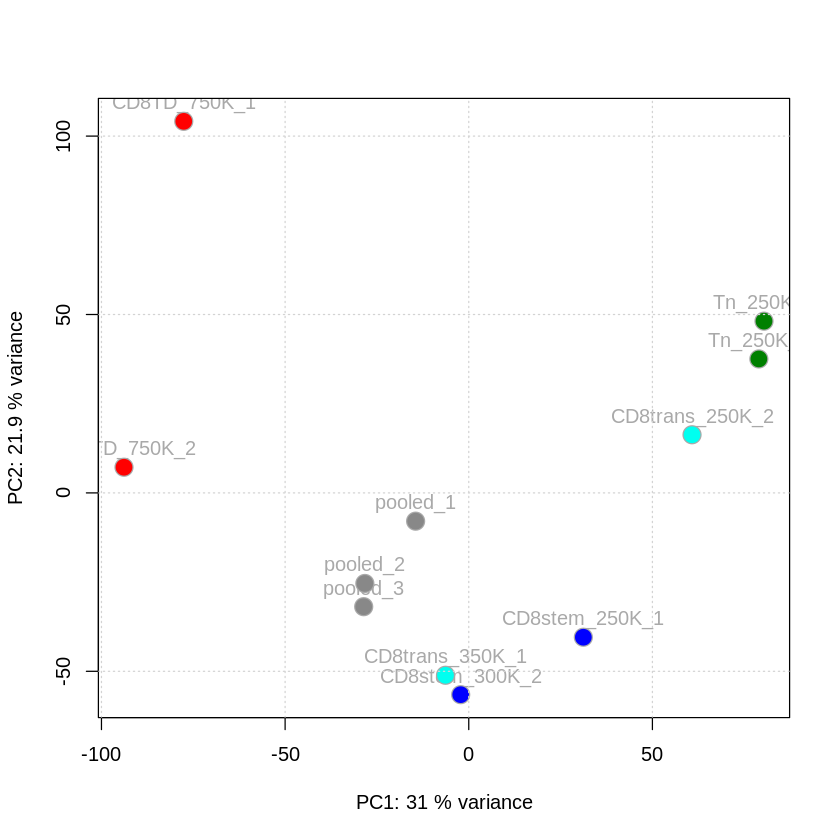

In [30]:
#' Perform the PCA omitting all features with an NA in any of the
pc <- prcomp(t(na.omit(data.df.log2)), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     col = "darkgrey", bg = color_v, cex = 2,
     text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2),
          pos = 3, cex = 1))
     grid()
    # text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2)
    # pos = 3, cex = 2)

In [31]:
# print the pdf
pdf(file.path(output_dir,glue("{exp_label}_PCA_wt_labels.pdf")))
#' Perform the PCA omitting all features with an NA in any of the
pc <- prcomp(t(na.omit(data.df.log2)), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     col = "darkgrey", bg = color_v, cex = 2,
     text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2),
          pos = 3, cex = 1))
     grid()
    # text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2)

dev.off()

png 
  2

-----

-----

-----